## Task 6.5 Clustering

### This script contains the following steps:

#### 1. Importing libraries and dataframe and dropping categorical columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and dropping categorical columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 6/Violence'

In [4]:
# Importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data','Clean Data','EU_Data.pkl'))

In [5]:
# Creating subsets for data on intentional homicide
df_1= df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.FE.P5']

In [6]:
df_1.shape

(753, 7)

In [7]:
df_1.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [6]:
# dropping categorical columns in df_1
df_1 = df_1.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code', 'EU Region'])

In [7]:
df_1.head(5)

,Year,Value
10748,2021,0
10749,2020,0
10750,2019,0
10751,2018,1
10752,2017,0


In [8]:
# changing the type of column year to int64 
df_1['Year'] = df_1['Year'].astype('int')

In [9]:
# datatypes of dataframe
df_1.dtypes

Year     int64
Value    int64
dtype: object

#### I decided not to standardize the column "Year". Before making this decision I did standardize the colomn "year", however I was not satisfied with the grouping of the data points after the standardization. (See image below)
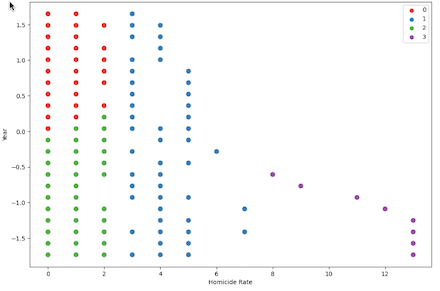


### 2. The elbow technique

In [10]:
 # Defining the range of potential clusters in the data
num_cl = range(1, 10)
 # Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Creating a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))]

score

/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-30975.370517928244,
 -9396.058349105891,
 -5225.059100361767,
 -3768.7610461139625,
 -2910.213991579628,
 -2235.5857815937484,
 -1864.619116123526,
 -1625.3831964876094,
 -1424.026764544907]

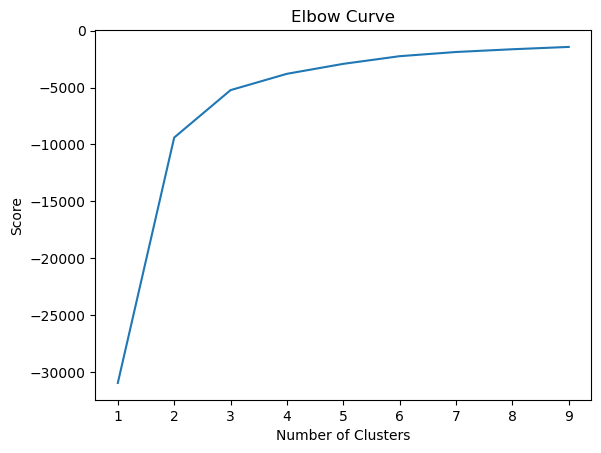

In [14]:
# Plotting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There are two larger jumps from two to three and from four to five, and one small jump from 6 to 7. This means that the optimal count for the clusters is four.

### 3. k-means clustering

In [12]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fitting the k-means object to the data
kmeans.fit(df_1)

/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
df_1['clusters'] = kmeans.fit_predict(df_1)

/Users/parvinrahimi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_1

,Year,Value,clusters
10748,2021,0,0
10749,2020,0,0
10750,2019,0,0
10751,2018,1,0
10752,2017,0,0
...,...,...,...
13169,2009,0,3
13170,2008,0,3
13171,2007,1,3
13172,2006,1,3


In [16]:
# exporting as csv
df_1.to_csv(os.path.join(path,'02 Data', 'Clean Data', 'kmeans.csv'))

In [22]:
df_1['clusters'].value_counts()

2    210
3    205
0    179
1    159
Name: clusters, dtype: int64

/var/folders/2m/x4ncpd5d6zn4gz7_m6f16nww0000gn/T/ipykernel_7457/3239228468.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax = sns.scatterplot(x=df_1['Value'], y=df_1['Year'], hue=kmeans.labels_, s=50, palette=sns.color_palette("Set1"))


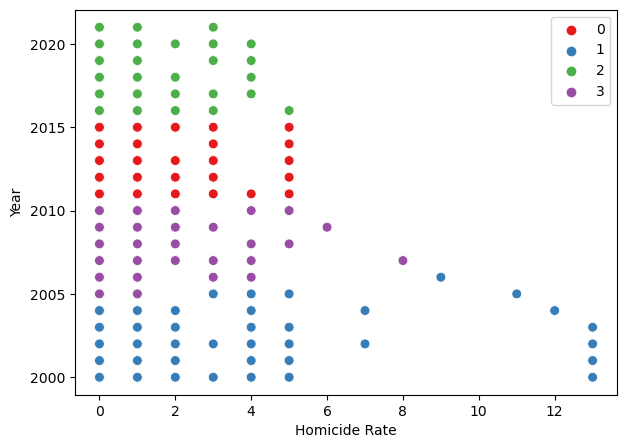

In [23]:
# Plotting the clusters for the "Value" and "Year" variables
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=df_1['Value'], y=df_1['Year'], hue=kmeans.labels_, s=50, palette=sns.color_palette("Set1")) 
ax.grid(False) 
plt.xlabel('Homicide Rate') 
plt.ylabel('Year') 
plt.show()

In [24]:
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'red'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'blue'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'green'
df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'purple'

In [25]:
df_1.groupby(['clusters', 'cluster']).agg({'Value':['mean', 'median']})

Value       
                      mean median
clusters cluster                 
0        red      0.553073    0.0
1        blue     1.698113    1.0
2        green    0.380952    0.0
3        purple   0.678049    0.0

In [26]:
df_1.groupby('Year').agg({'Value':['mean', 'median']})

Value       
          mean median
Year                 
2000  1.551724    1.0
2001  1.483871    1.0
2002  1.741935    1.0
2003  1.566667    1.0
2004  1.343750    1.0
2005  1.058824    0.0
2006  0.970588    0.0
2007  0.828571    0.0
2008  0.676471    0.0
2009  0.702703    0.0
2010  0.729730    0.0
2011  0.583333    0.0
2012  0.638889    0.0
2013  0.527778    0.0
2014  0.485714    0.0
2015  0.527778    0.0
2016  0.472222    0.0
2017  0.432432    0.0
2018  0.428571    0.0
2019  0.324324    0.0
2020  0.382353    0.0
2021  0.225806    0.0

#### Conclusions: 
#### - Based on the plot, we can clearly see that cluster 1 (blue) containg data from 2000 to 2006 has the highest mean and thus the highest homicide rate in EU. 
#### - Cluster 3 (purple) includes the second highest homicide rate in EU 2006 to 2011.
#### - Cluster 0 (red) and 2 (green), which contain data from 2012 to 2021 have the least number of homicide in EU, confirming our hypothesis that the homicide rate in EU has decreased in the last decade. The data also indicates that since 2017 the homicide rate has been dropping steadily with the lowest mean of 0.2 in 2021 compared with 1,5 in early 2000. 